In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data =  pd.read_excel('data/Data.xlsx')
data.head()

,ID,X1,X2,X3,Z1,Z2,A,B,Y
0,1001,6.44,2.0,1.00,5,16.0,738,0.0,11.0
1,1002,0.00,0.0,0.00,4,2.0,315,0.0,0.0
2,1003,18.50,3.0,2.50,108,64.0,11415,205302.1,21.0
3,1004,4.32,1.0,0.50,0,6.0,561,0.0,7.0
4,1005,0.00,0.0,7.16,890,55.0,0,0.0,0.0


In [4]:
data_without_0 = data[data['Y'] != 0]
data_without_0.shape

(30, 9)

### Data Splitting

In [5]:
X = data_without_0.drop('Y',axis=1)
X.drop('ID',axis=1,inplace=True)
y = data_without_0['Y']


#### Replacing null values with columns mean

In [6]:
X.fillna(X.mean(),inplace=True)

In [49]:
X.shape

(30, 7)

### Feature Scaling

In [27]:
# Scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,X1,X2,X3,Z1,Z2,A,B
0,-1.107300,-0.603281,-0.789465,-0.859053,-0.827104,-1.157882,-0.665381
1,0.048193,-0.377559,-0.551212,-0.527534,-0.259667,0.186894,-0.584937
2,-1.310422,-0.829004,-0.868882,-0.875146,-0.945320,-1.180175,-0.665381
3,0.880800,0.714938,1.783668,0.125849,-0.354240,1.782061,1.991174
4,-0.123310,-0.151836,-0.630629,1.310305,0.567844,0.313223,-0.595456


In [8]:
# removing outliers using z score technique
# from scipy import stats
# z = np.abs(stats.zscore(X_scaled))
# X_scaled = X_scaled[(z < 3).all(axis=1)]
# # y = y[(z < 3).all(axis=1)]

# X_scaled.shape

(28, 7)

## Clustering

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

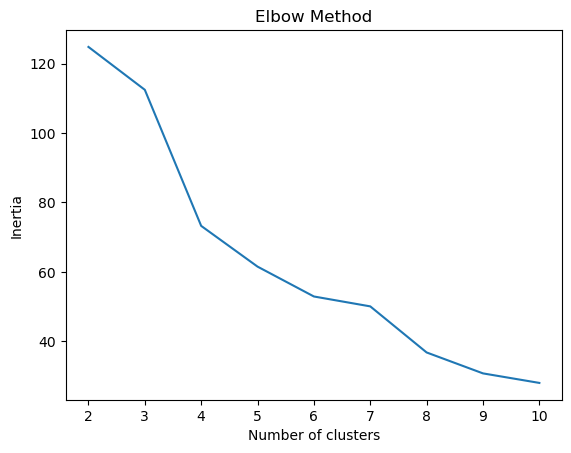

In [28]:
from sklearn.cluster import KMeans


#setting random seed for reporducibility
np.random.seed(123)


### Elbow Method

# elbow method to determine the number of clusters
inertia = []


from sklearn.metrics import silhouette_score
silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled,kmeans.labels_))


plt.plot(range(2,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

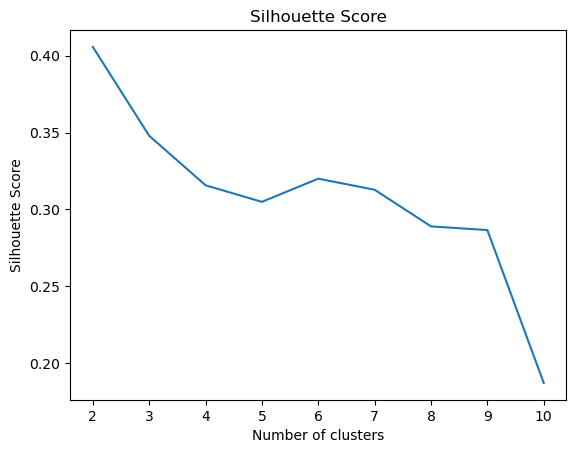

In [29]:
#po=lotting shiloutte score
plt.plot(range(2,11),silhouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()


In [30]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
X_scaled['4_clusters_all_features'] = kmeans.predict(X_scaled)

c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
X_scaled['4_clusters_all_features'].value_counts()

4_clusters_all_features
3    13
0     8
2     6
1     3
Name: count, dtype: int64

In [32]:
# clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled[['X1','X2']])
X_scaled['4_clusters_X1X2'] = kmeans.predict(X_scaled[['X1','X2']])

X_scaled['4_clusters_X1X2'] .value_counts()


c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4_clusters_X1X2
0    12
3    11
2     6
1     1
Name: count, dtype: int64

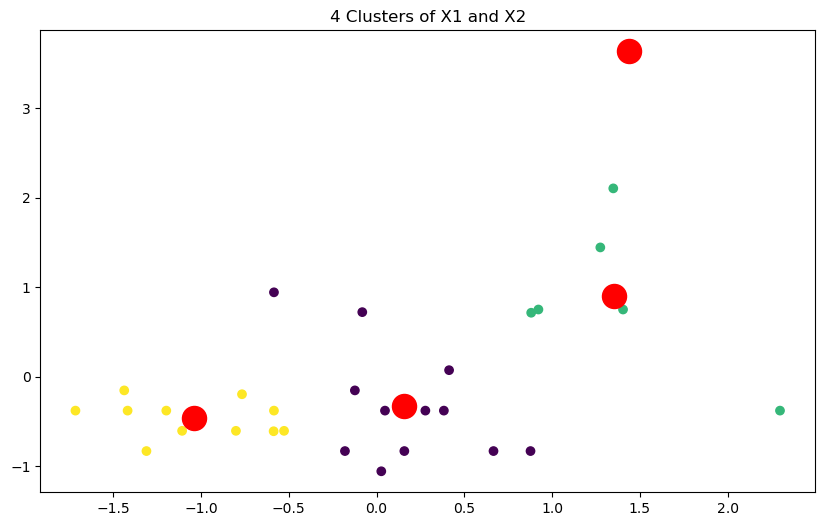

In [33]:
# plotting the clusters, along with the centroids
plt.figure(figsize=(10,6))
plt.scatter(X_scaled['X1'],X_scaled['X2'],c=X_scaled['4_clusters_X1X2'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.title('4 Clusters of X1 and X2')
plt.show()

In [34]:
# DBScan Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=3)
X_scaled['dbscan'] = dbscan.fit_predict(X_scaled)

X_scaled['dbscan'].value_counts()


dbscan
-1    24
 0     3
 1     3
Name: count, dtype: int64

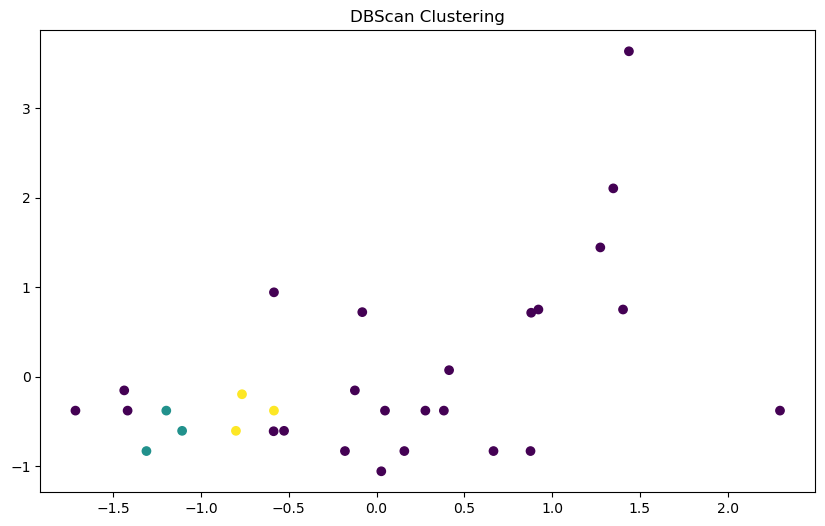

In [35]:
# poltting DBScan clusters with centroids
plt.figure(figsize=(10,6))
plt.scatter(X_scaled['X1'],X_scaled['X2'],c=X_scaled['dbscan'],cmap='viridis')
plt.title('DBScan Clustering')
plt.show()

In [36]:
#PCA to extract the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print(X_pca.shape)
pca.explained_variance_ratio_


(30, 2)


array([0.45795428, 0.21186335])

4_clusters_pca_2
3    11
2     8
1     6
0     5
Name: count, dtype: int64


c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


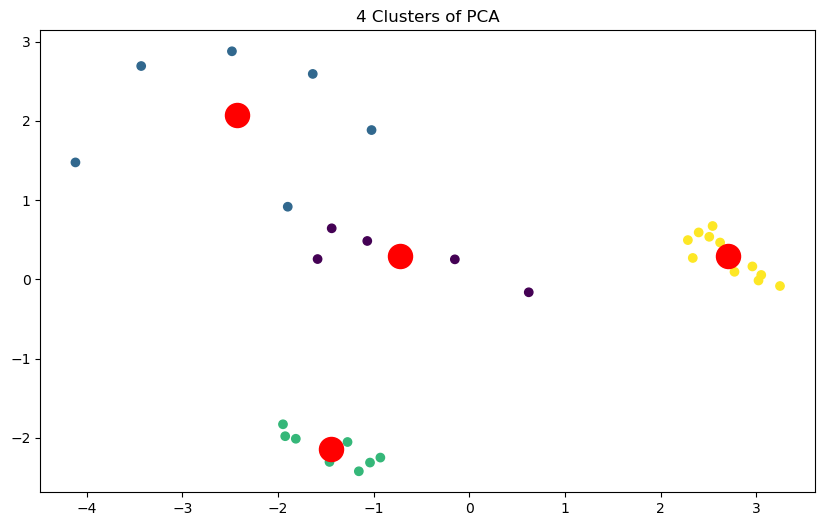

In [37]:
# perfroming clustering on the first two principal components
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca)
X_scaled['4_clusters_pca_2'] = kmeans.predict(X_pca)

print(X_scaled['4_clusters_pca_2'].value_counts())

# plotting the clusters, along with the centroids
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=X_scaled['4_clusters_pca_2'],cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red')
plt.title('4 Clusters of PCA')
plt.show()


4_clusters_pca_3
1    11
0     8
2     8
3     3
Name: count, dtype: int64


c:\Users\sathw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


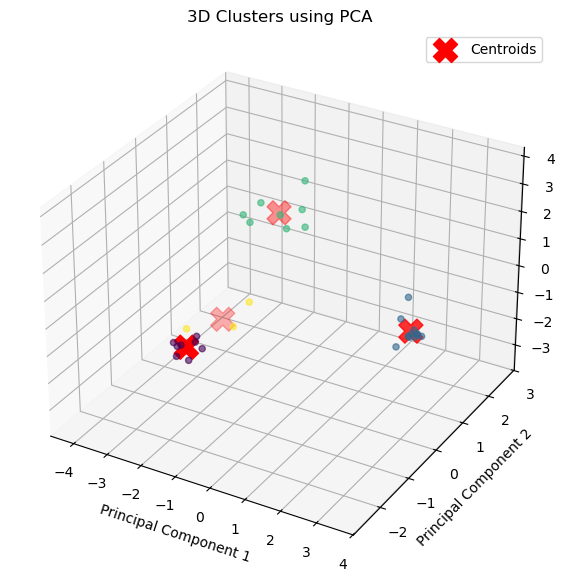

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Performing PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)  # Assuming X_scaled is your standardized dataset

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
X_scaled['4_clusters_pca_3'] = kmeans.predict(X_pca)

print(X_scaled['4_clusters_pca_3'].value_counts())

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=X_scaled['4_clusters_pca_3'], cmap='viridis', alpha=0.6)

# Scatter plot for cluster centroids
ax.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 2], 
           s=300, c='red', marker='X', label='Centroids')

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Clusters using PCA')

# Show legend
ax.legend()
plt.show()


In [39]:
X_scaled

,X1,X2,X3,Z1,Z2,A,B,4_clusters_all_features,4_clusters_X1X2,dbscan,4_clusters_pca_2,4_clusters_pca_3
0,-1.107300,-0.603281,-0.789465,-0.859053,-0.827104,-1.157882,-0.665381,3,3,0,3,1
1,0.048193,-0.377559,-0.551212,-0.527534,-0.259667,0.186894,-0.584937,0,0,-1,2,0
2,-1.310422,-0.829004,-0.868882,-0.875146,-0.945320,-1.180175,-0.665381,3,3,0,3,1
3,0.880800,0.714938,1.783668,0.125849,-0.354240,1.782061,1.991174,2,2,-1,1,2
4,-0.123310,-0.151836,-0.630629,1.310305,0.567844,0.313223,-0.595456,0,0,-1,2,0
5,-0.526679,-0.603281,-0.710047,-0.698121,-0.957141,-0.475103,-0.206645,3,3,-1,3,1
6,0.413237,0.073887,1.116560,-0.459943,-0.555207,-0.017020,1.713666,2,0,-1,0,2
7,0.383536,-0.377559,-0.471794,2.060246,-0.188738,0.131854,-0.652370,0,0,-1,2,0
8,-1.417731,-0.377559,-0.789465,-0.839741,-0.401527,-1.086468,-0.589859,3,3,-1,3,1
9,1.348363,2.103132,-0.154123,0.045383,-0.023236,1.226870,-0.638102,1,2,-1,0,3


In [47]:
scaler.inverse_transform(X_scaled.iloc[:,0:7])

array([[6.44000000e+00, 2.00000000e+00, 1.00000000e+00, 5.00000000e+00,
        1.60000000e+01, 7.38000000e+02, 0.00000000e+00],
       [1.85000000e+01, 3.00000000e+00, 2.50000000e+00, 1.08000000e+02,
        6.40000000e+01, 1.14150000e+04, 2.05302100e+05],
       [4.32000000e+00, 1.00000000e+00, 5.00000000e-01, 0.00000000e+00,
        6.00000000e+00, 5.61000000e+02, 0.00000000e+00],
       [2.71900000e+01, 7.84000000e+00, 1.72000000e+01, 3.11000000e+02,
        5.60000000e+01, 2.40800000e+04, 6.77981909e+06],
       [1.67100000e+01, 4.00000000e+00, 2.00000000e+00, 6.79000000e+02,
        1.34000000e+02, 1.24180000e+04, 1.78457410e+05],
       [1.25000000e+01, 2.00000000e+00, 1.50000000e+00, 5.50000000e+01,
        5.00000000e+00, 6.15900000e+03, 1.17074334e+06],
       [2.23100000e+01, 5.00000000e+00, 1.30000000e+01, 1.29000000e+02,
        3.90000000e+01, 9.79600000e+03, 6.07158839e+06],
       [2.20000000e+01, 3.00000000e+00, 3.00000000e+00, 9.12000000e+02,
        7.00000000e+01, 1

In [60]:
X_scaled = X_scaled.add_prefix("scaled_")


In [66]:
combined_df = pd.concat([X.reset_index(drop=True), X_scaled], axis=1)
combined_df = pd.concat([combined_df, y.reset_index(drop=True)], axis=1)

combined_df.columns

Index(['X1', 'X2', 'X3', 'Z1', 'Z2', 'A', 'B', 'scaled_X1', 'scaled_X2',
       'scaled_X3', 'scaled_Z1', 'scaled_Z2', 'scaled_A', 'scaled_B',
       'scaled_4_clusters_all_features', 'scaled_4_clusters_X1X2',
       'scaled_dbscan', 'scaled_4_clusters_pca_2', 'scaled_4_clusters_pca_3',
       'Y'],
      dtype='object')

In [68]:
combined_df

,X1,X2,X3,Z1,Z2,A,B,scaled_X1,scaled_X2,scaled_X3,scaled_Z1,scaled_Z2,scaled_A,scaled_B,scaled_4_clusters_all_features,scaled_4_clusters_X1X2,scaled_dbscan,scaled_4_clusters_pca_2,scaled_4_clusters_pca_3,Y
0,6.44,2.00,1.00,5,16.000000,738,0.00,-1.107300,-0.603281,-0.789465,-0.859053,-0.827104,-1.157882,-0.665381,3,3,0,3,1,11.0
1,18.50,3.00,2.50,108,64.000000,11415,205302.10,0.048193,-0.377559,-0.551212,-0.527534,-0.259667,0.186894,-0.584937,0,0,-1,2,0,21.0
2,4.32,1.00,0.50,0,6.000000,561,0.00,-1.310422,-0.829004,-0.868882,-0.875146,-0.945320,-1.180175,-0.665381,3,3,0,3,1,7.0
3,27.19,7.84,17.20,311,56.000000,24080,6779819.09,0.880800,0.714938,1.783668,0.125849,-0.354240,1.782061,1.991174,2,2,-1,1,2,16.0
4,16.71,4.00,2.00,679,134.000000,12418,178457.41,-0.123310,-0.151836,-0.630629,1.310305,0.567844,0.313223,-0.595456,0,0,-1,2,0,13.0
5,12.50,2.00,1.50,55,5.000000,6159,1170743.34,-0.526679,-0.603281,-0.710047,-0.698121,-0.957141,-0.475103,-0.206645,3,3,-1,3,1,5.0
6,22.31,5.00,13.00,129,39.000000,9796,6071588.39,0.413237,0.073887,1.116560,-0.459943,-0.555207,-0.017020,1.713666,2,0,-1,0,2,10.5
7,22.00,3.00,3.00,912,70.000000,10978,33206.96,0.383536,-0.377559,-0.471794,2.060246,-0.188738,0.131854,-0.652370,0,0,-1,2,0,28.0
8,3.20,3.00,1.00,11,52.000000,1305,192741.55,-1.417731,-0.377559,-0.789465,-0.839741,-0.401527,-1.086468,-0.589859,3,3,-1,3,1,6.0
9,32.07,13.99,5.00,286,84.000000,19672,69619.76,1.348363,2.103132,-0.154123,0.045383,-0.023236,1.226870,-0.638102,1,2,-1,0,3,63.0


In [69]:
combined_df.groupby('scaled_4_clusters_all_features')['Y'].mean()

scaled_4_clusters_all_features
0    27.187500
1    51.000000
2    21.583333
3    10.384615
Name: Y, dtype: float64

In [70]:
combined_df.groupby('scaled_dbscan')['Y'].mean()

scaled_dbscan
-1    23.375000
 0    10.333333
 1    14.333333
Name: Y, dtype: float64

In [71]:
combined_df.groupby('scaled_4_clusters_pca_2')['Y'].mean()

scaled_4_clusters_pca_2
0    28.100000
1    27.666667
2    27.187500
3    10.090909
Name: Y, dtype: float64

In [72]:
combined_df.groupby('scaled_4_clusters_pca_3')['Y'].mean()

scaled_4_clusters_pca_3
0    27.187500
1    10.090909
2    19.187500
3    51.000000
Name: Y, dtype: float64